In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras.layers import MaxPooling2D

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
fldr="/Users/khushi/Desktop/python/UTKFace"
import os
files=os.listdir(fldr)

create list of images from dataset


In [4]:
ages=[]
genders=[] 
images=[]

for f in files:
    age=int(f.split('_')[0])
    gender = int(f.split('_')[1])
    total=fldr+'/'+f
    print(total)
    image = cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

/Users/khushi/Desktop/python/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/36_0_1_20170117163203851.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/86_1_0_20170120225751953.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/26_1_0_20170116171048641.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/1_1_2_20161219154612988.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/52_0_1_20170117161018159.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/25_1_0_20170117134403373.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/16_0_0_20170104003740977.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/27_0_3_20170119210058457.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/36_0_3_20170119180245724.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/58_0_2_20170116193704928.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/6_1_0_20170114024512634.jpg.chip.jpg
/Users/khushi/Desktop/python/UTKFace/35_1_2_20170116185947151.jpg.chip.jpg
/Users/khushi/Desktop/python


Create list of age and gender from dataset

In [48]:
for f in files:
    age=int(f.split('_')[0])
    gender=int(f.split('_')[1])
    ages.append(age)
    genders.append(gender)

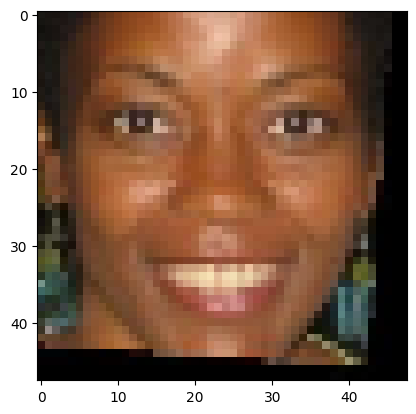

In [49]:
plt.imshow(images[14]) #viewing a sample image

In [50]:
print(ages[14])
print(genders[14])

26
1


gender 1 is for female and 0 for male

In [51]:
images_f=np.array(images) #saving images array in the system
ages_f=np.array(ages) #saving ages array
genders_f=np.array(genders) #saving genders array

In [52]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

finding no of elements in the dataset


In [53]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)



[24782 22634]


plotting no of male and female samples


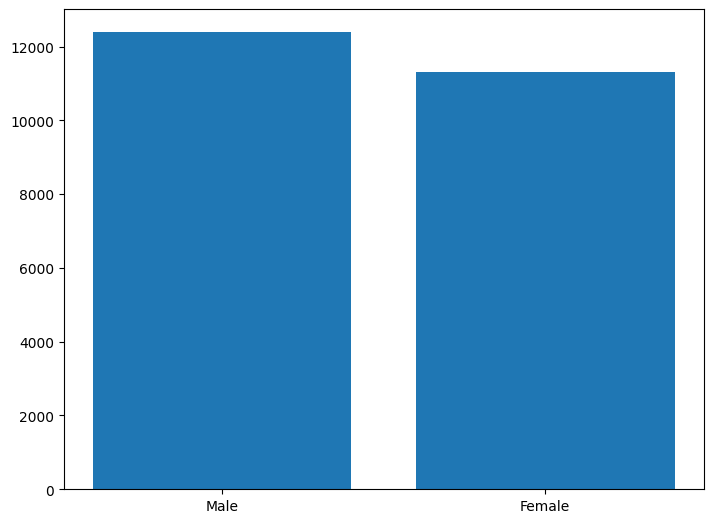

In [11]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

plotting the samples age wise

In [12]:
values, counts = np.unique(ages_f,return_counts=True)
print (counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


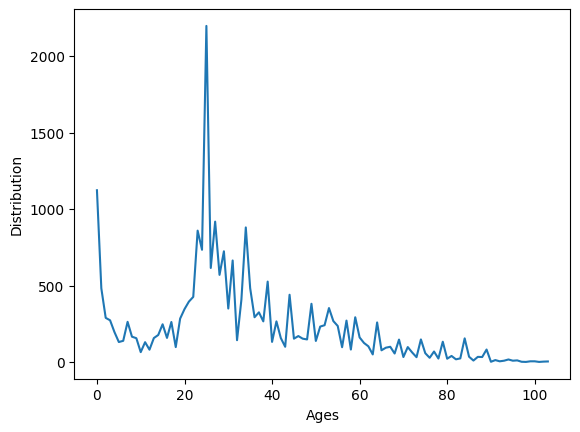

In [13]:
val=values.tolist() #converting age values to lists
cnt=counts.tolist() #converting age counts to lists

#plotting samples agewise
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

defining labels for outputs


In [14]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders [i])
    labels.append(label)
    i=i+1

creating another list of images from existing one for better learning

In [15]:
images_f_2=images_f/255 #downscaling as it is easy for models to recognize values as 0 and 1 

In [16]:
images_f_2.shape

(23708, 48, 48, 3)

In [17]:
labels_f=np.array(labels)

splitting the dataset into test and train


In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [19]:
Y_train[0:5]
# 1 is for females and 0 is for males 

array([[25,  0],
       [61,  0],
       [65,  1],
       [86,  1],
       [25,  1]])

spliiting y test and y tain for better understanding


In [20]:
Y_train_2=[Y_train[:,1],Y_train[:,0]] 
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [21]:
Y_train_2[0][0:5] #gender

array([0, 0, 1, 1, 1])

In [22]:
Y_train_2[1][0:5] #ages

array([25, 61, 65, 86, 25])

In [23]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x) #to prevent overfitting 
    x=Activation('relu')(x)
    return x

defining convolution layers , more layers : more accurate and biased 
less layers: less accurate but not biased 


In [24]:
def model_builder(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten=Flatten()(maxp_5)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="adam",metrics=["accuracy"])
    return model
    

In [25]:
M=model_builder((48,48,3))

In [26]:
M.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
fle_s="Age_sex_detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')

In [29]:
Early_stop=tf.keras.callbacks.EarlyStopping(patience=25,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [30]:

History=M.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 17.0127 - sex_out_loss: 0.7020 - age_out_loss: 15.9791 - sex_out_accuracy: 0.5239 - age_out_accuracy: 0.0462
Epoch 1: val_loss improved from inf to 19.13054, saving model to Age_sex_detection.h5
278/278 [==============================] - 38s 135ms/step - loss: 17.0127 - sex_out_loss: 0.7020 - age_out_loss: 15.9791 - sex_out_accuracy: 0.5239 - age_out_accuracy: 0.0462 - val_loss: 19.1305 - val_sex_out_loss: 0.6906 - val_age_out_loss: 18.1632 - val_sex_out_accuracy: 0.5229 - val_age_out_accuracy: 0.0503
Epoch 2/250
  1/278 [..............................] - ETA: 32s - loss: 14.0093 - sex_out_loss: 0.7020 - age_out_loss: 13.0306 - sex_out_accuracy: 0.3750 - age_out_accuracy: 0.0469

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 13.3038 - sex_out_loss: 0.6569 - age_out_loss: 12.3265 - sex_out_accuracy: 0.5981 - age_out_accuracy: 0.0462
Epoch 2: val_loss improved from 19.13054 to 12.02948, saving model to Age_sex_detection.h5
278/278 [==============================] - 36s 131ms/step - loss: 13.3038 - sex_out_loss: 0.6569 - age_out_loss: 12.3265 - sex_out_accuracy: 0.5981 - age_out_accuracy: 0.0462 - val_loss: 12.0295 - val_sex_out_loss: 0.6167 - val_age_out_loss: 11.0477 - val_sex_out_accuracy: 0.6894 - val_age_out_accuracy: 0.0503
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 10.8180 - sex_out_loss: 0.5829 - age_out_loss: 9.8503 - sex_out_accuracy: 0.6991 - age_out_accuracy: 0.0462
Epoch 3: val_loss did not improve from 12.02948
278/278 [==============================] - 41s 146ms/step - loss: 10.8180 - sex_out_loss: 0.5829 - age_out_loss: 9.8503 - sex_out_accuracy: 0.6991 - age_out_accuracy: 0.0462 - val_loss: 13.7901 - val_se

In [54]:
M.evaluate(X_test,Y_test_2)

186/186 [==============================] - 3s 14ms/step - loss: 7.3097 - sex_out_loss: 0.2730 - age_out_loss: 6.3495 - sex_out_accuracy: 0.8841 - age_out_accuracy: 0.0503


[7.3096842765808105,
 0.27297571301460266,
 6.349549770355225,
 0.8840897679328918,
 0.05027838796377182]

In [55]:
pred=M.predict(X_test)

186/186 [==============================] - 2s 13ms/step


In [56]:
pred[1]

array([[28.571342 ],
       [ 4.7021837],
       [22.59999  ],
       ...,
       [51.48242  ],
       [29.842247 ],
       [46.008503 ]], dtype=float32)

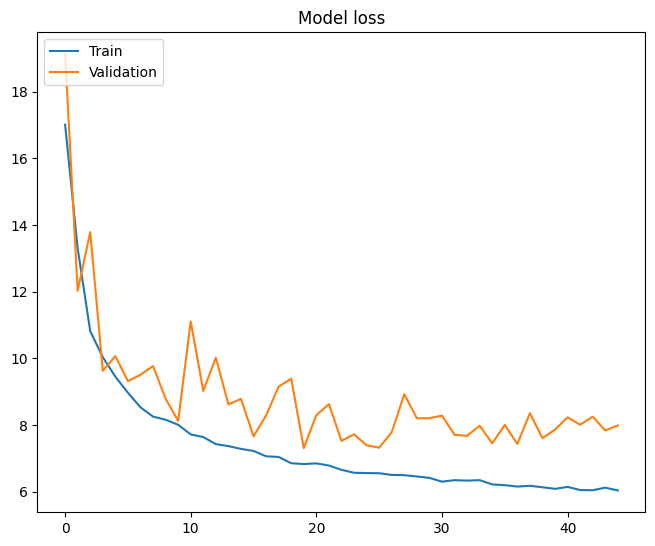

In [57]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel=('epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
#blue line : train loss
#orange line : validation loss
#plotting loss

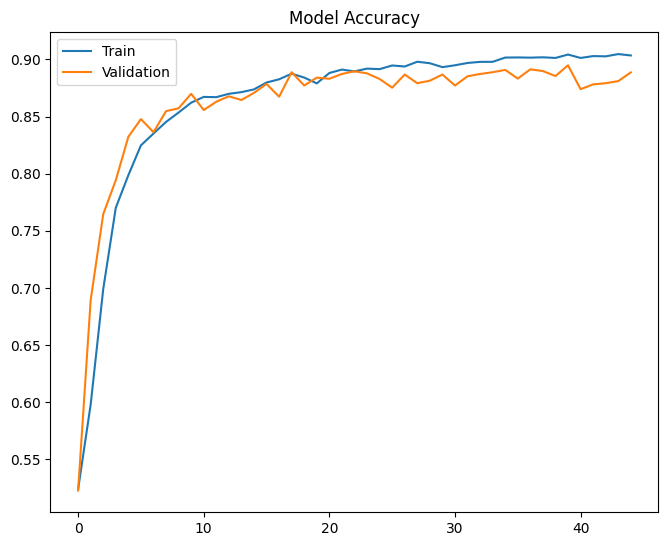

In [35]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
#plotting gender accuracy

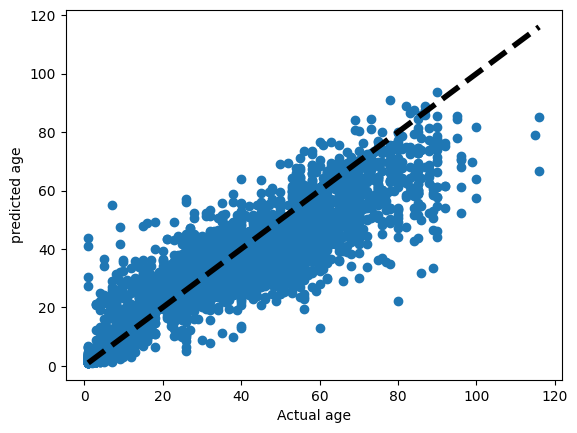

In [58]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual age')
ax.set_ylabel('predicted age')
plt.show()
#plotting age accuracy which is very low


In [59]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:
report = classification_report(Y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3099
           1       0.90      0.85      0.88      2828

    accuracy                           0.88      5927
   macro avg       0.89      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [62]:
cm=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

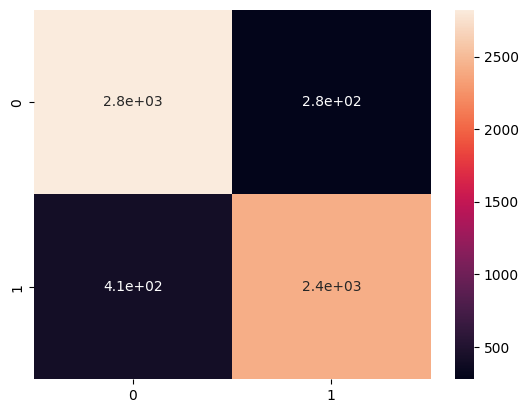

In [63]:
import seaborn as sns
sns.heatmap(cm,annot=True)


In [64]:
def test_image(ind,images_f,images_f_2,M):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=M.predict(np.array([image_test]))
    sex_f=['male','female']
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted age is : "+ str(age))
    print("Predicted gender is : " + sex_f[sex])
    

1/1 [==============================] - 0s 14ms/step
Predicted age is : 2
Predicted gender is : female


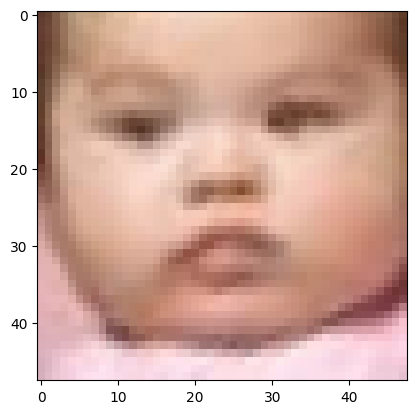

In [65]:
test_image(4,images_f,images_f_2,M)

1/1 [==============================] - 0s 23ms/step
Predicted age is : 28
Predicted gender is : female


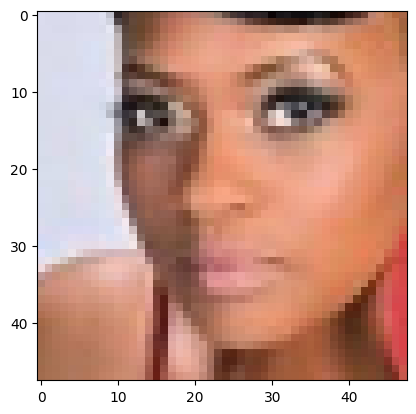

In [66]:
test_image(44,images_f,images_f_2,M)

1/1 [==============================] - 0s 15ms/step
Predicted age is : 28
Predicted gender is : male


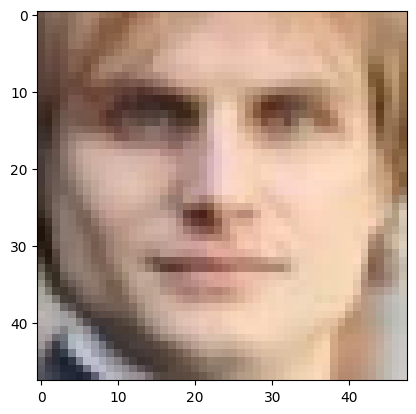

In [67]:
test_image(444,images_f,images_f_2,M)

1/1 [==============================] - 0s 21ms/step
Predicted age is : 27
Predicted gender is : male


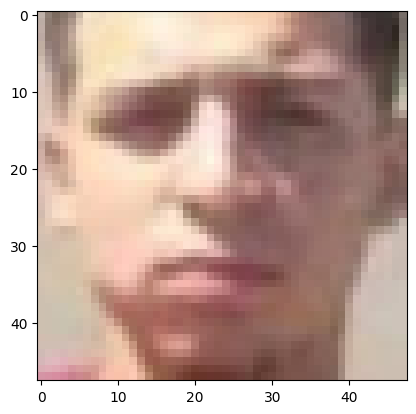

In [68]:
test_image(1244,images_f,images_f_2,M)

1/1 [==============================] - 0s 13ms/step
Predicted age is : 26
Predicted gender is : male


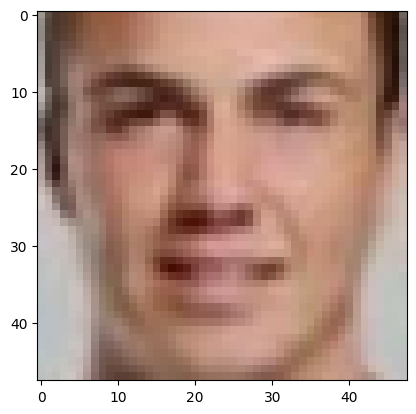

In [69]:
test_image(564,images_f,images_f_2,M)